In [14]:
import pandas as pd
import time

past = pd.read_csv("./past.csv", usecols=["Sex", "AGE", "Region", "TIME", "Value"])
past.columns = ["sex", "age_cat", "name", "year", "value"]
past.sex = past.sex.apply(lambda x: x.lower()[0])
past.name = past.name.apply(lambda x: x.replace("Woden Valley", "Woden").replace("Urriarra - Namadgi", "Urriarra-Namadgi"))

def fix_year(year):
    return int(year[:-3]) if "(" in year else int(year)

proj_f = pd.read_csv("./projections_females.csv", thousands=",")
proj_f.Year = proj_f.Year.apply(fix_year)

proj_m = pd.read_csv("./projections_males.csv", thousands=",")
proj_m.Year = proj_m.Year.apply(fix_year)

proj_p = pd.read_csv("./projections_people.csv", thousands=",")
proj_p.Year = proj_p.Year.apply(fix_year)

age_cats = []
for x in range(0, 90, 5):
    label = f"{x}-{x + 4} years" if x < 85 else "85+ years"
    upper = (x + 4 if x < 85 else "-")
    age_cats.append([
        label,
        x,
        upper
    ])

data = pd.DataFrame(columns=["year", "district", "sex"] + [x[0] for x in age_cats])

years = [x for x in range(2001, 2059)]
sexes = ["m", "f", "p"]

for j, year in enumerate(years):
    
    for sex in sexes:
        for district in past.name.unique():
            row_data = [year, district, sex]
            for i, age_cat in enumerate(age_cats):
                if year < 2020:
                    row_data.append(past[(past.age_cat == list(past.age_cat.unique())[i]) & (past.sex == sex) & (past.name == district) & (past.year == year)].iat[0, 4])
                else:                    
                    data_this = proj_m if sex == "m" else proj_f if sex == "f" else proj_p                    
                    if age_cat[1] > 80:
                        age_bucket = data_this[(data_this.Year == year) & (data_this.District == district)].iat[0, 87]
                    else:
                        age_bucket = 0                        
                        for age in range(age_cat[1], age_cat[2] + 1):
                            pass
                            age_bucket = age_bucket + data_this[(data_this.Year == year) & (data_this.District == district)].iat[0, age + 2]
                    row_data.append(age_bucket)
            data.loc[len(data)] = row_data
            
    print(f"processing ... {j / (len(years) - 1):.0%}", end="\r")

print("processing ... complete", end="\r")

data.columns = list(data.columns[:3]) + (list(range(18)))
data.to_csv("./chartData.csv", index=False)
data

,year,district,sex,0,1,2,3,4,5,6,...,8,9,10,11,12,13,14,15,16,17
0,2001,Belconnen,m,2645,2901,2962,3606,4216,3682,3226,...,2974,3069,3484,2516,1666,1087,793,562,276,165
1,2001,Canberra East,m,37,24,46,50,129,113,79,...,60,65,59,44,30,23,22,5,3,1
2,2001,Gungahlin,m,1293,1048,781,675,878,1343,1402,...,917,721,650,390,259,170,134,67,27,10
3,2001,North Canberra,m,909,882,852,1527,2519,1884,1715,...,1365,1186,1091,768,630,603,670,570,303,159
4,2001,South Canberra,m,510,579,714,811,730,953,830,...,872,815,862,596,400,375,374,368,237,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,2058,Tuggeranong,p,4745,4905,4850,5129,5294,5132,4930,...,5172,5509,5826,5999,6011,5567,4999,4147,3068,3881
1736,2058,Weston Creek,p,1727,1763,1587,1445,1163,1139,1398,...,1857,1895,1717,1599,1485,1377,1353,1164,873,1075
1737,2058,Woden,p,2826,2992,2876,2738,3369,4337,4393,...,3724,3758,3542,3525,3105,2935,2631,2260,1741,2034
1738,2058,Molonglo,p,3775,3585,3539,3497,2920,3188,3823,...,4147,4180,4299,4335,4373,3685,2873,2223,1605,1773


<ipython-input-33-4ed0ead22e4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_data["total"] = chart_data.sum(axis=1) - chart_data.year


,year,district,sex,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,total
1730,2058,Belconnen,p,8518,8137,7824,8706,11766,11213,10341,...,9526,9042,8506,8649,8123,7148,5956,4459,4853,152453
1731,2058,Canberra East,p,32,32,26,45,122,119,153,...,77,51,51,47,45,55,53,44,65,1233
1732,2058,Gungahlin,p,5357,5046,4920,5102,5688,5982,6052,...,5966,5586,4963,4944,4480,3769,3004,2223,2486,87508
1733,2058,North Canberra,p,2776,2874,3225,6655,14202,11275,7325,...,4836,4818,4298,4337,3943,3424,2924,2289,2444,91597
1734,2058,South Canberra,p,1376,1457,1701,2030,2046,3459,2980,...,2294,2383,2405,2590,2354,2126,1773,1381,1597,38534
1735,2058,Tuggeranong,p,4745,4905,4850,5129,5294,5132,4930,...,5509,5826,5999,6011,5567,4999,4147,3068,3881,90179
1736,2058,Weston Creek,p,1727,1763,1587,1445,1163,1139,1398,...,1895,1717,1599,1485,1377,1353,1164,873,1075,26265
1737,2058,Woden,p,2826,2992,2876,2738,3369,4337,4393,...,3758,3542,3525,3105,2935,2631,2260,1741,2034,56361
1738,2058,Molonglo,p,3775,3585,3539,3497,2920,3188,3823,...,4180,4299,4335,4373,3685,2873,2223,1605,1773,62033
1739,2058,Urriarra-Namadgi,p,52,40,43,35,31,43,44,...,47,33,28,27,23,19,14,19,12,605


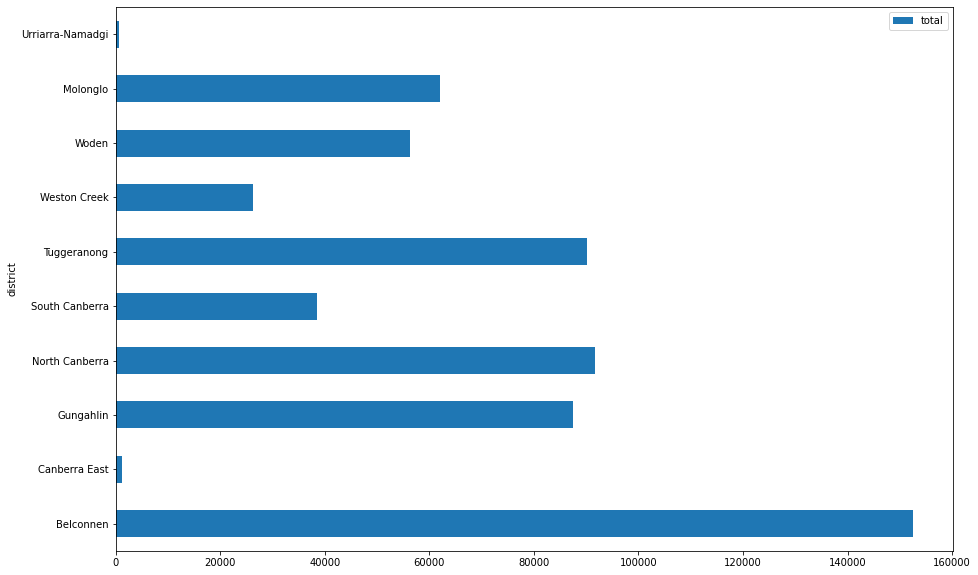

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("chartData.csv")

chart_data = data[(data.sex=="p") & (data.year==2058)]
chart_data["total"] = chart_data.sum(axis=1) - chart_data.year
chart_data.plot.barh(x="district", y="total", figsize=(15, 10))
chart_data